<a href="https://colab.research.google.com/github/SiddhanthNB/Brazil-forest-fire/blob/master/forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Loading the Data

In [2]:
data = pd.read_csv('https://github.com/SiddhanthNB/Brazil-forest-fire/raw/master/amazon.csv', encoding='latin1')

#### Understanding the Data

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
data.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


#### Adjusting the Data to our needs (Feature Engineering)

In [6]:
# Renaming 'number' column into 'number_fires' 
data['number'] = [int(x) for x in data['number']]
data = data.rename(columns={'number' : 'number_fires'})

In [7]:
# Renaming 'Rio' to 'Rio de Janeiro'
index = data[data['state'] == 'Rio'].index
data.loc[index, 'state'] = 'Rio de Janeiro'

# Renaming ''Piau to 'Piaui'
index = data[data['state'] == 'Piau'].index
data.loc[index, 'state'] = 'Piaui'

In [8]:
# Creating a Spanish to English  calendar months dictionary
english_month = ['january','feburary','march','april','may','june','july','august','september','october','november','december']
data_month = list(data['month'].unique())

month_dict = dict(zip(data_month, english_month))
month_dict

{'Abril': 'april',
 'Agosto': 'august',
 'Dezembro': 'december',
 'Fevereiro': 'feburary',
 'Janeiro': 'january',
 'Julho': 'july',
 'Junho': 'june',
 'Maio': 'may',
 'Março': 'march',
 'Novembro': 'november',
 'Outubro': 'october',
 'Setembro': 'september'}

In [9]:
# Changing Spanish months into English months using above formed Dictionary 
data.month = data['month'].map(month_dict)
data

,year,state,month,number_fires,date
0,1998,Acre,january,0,1998-01-01
1,1999,Acre,january,0,1999-01-01
2,2000,Acre,january,0,2000-01-01
3,2001,Acre,january,0,2001-01-01
4,2002,Acre,january,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,december,128,2012-01-01
6450,2013,Tocantins,december,85,2013-01-01
6451,2014,Tocantins,december,223,2014-01-01
6452,2015,Tocantins,december,373,2015-01-01


In [10]:
# Chcking all the state names of Brazil 
data.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piaui', 'Rio de Janeiro', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [11]:
# Creating different macro-regions of all the states of Brazil
data['macro-region'] =['North' if row.state in ('Acre', 'Amapa', 'Amazonas', 'Pará',
                                            'Rondonia', 'Roraima', 'Tocantins') else
                   'Northeast' if row.state in ('Alagoas','Bahia', 'Ceara', 'Maranhao', 'Paraiba', 
                                               'Pernambuco', 'Piau', 'Sergipe') else
                   'Central-West' if row.state in ('Distrito Federal', 'Goias', 
                                                   'Mato Grosso') else
                   'South-East' if row.state in ('Rio', 'Sao Paulo', 'Minas Gerais', 
                                              'Espirito Santo') else
                   'South'  for i, row in data.iterrows()]

data.head(10)

,year,state,month,number_fires,date,macro-region
0,1998,Acre,january,0,1998-01-01,North
1,1999,Acre,january,0,1999-01-01,North
2,2000,Acre,january,0,2000-01-01,North
3,2001,Acre,january,0,2001-01-01,North
4,2002,Acre,january,0,2002-01-01,North
5,2003,Acre,january,10,2003-01-01,North
6,2004,Acre,january,0,2004-01-01,North
7,2005,Acre,january,12,2005-01-01,North
8,2006,Acre,january,4,2006-01-01,North
9,2007,Acre,january,0,2007-01-01,North


## Exploratory Data Analysis 

#### Forest fires per macro-region in Brazil

In [12]:
region_data = data.groupby('macro-region').sum()

fig = go.Figure(data = go.Pie(labels = region_data.index, values = region_data['number_fires']))
fig.update_traces(textinfo = 'percent',
                  hoverinfo = 'label+value',
                  marker = dict(line = dict(color = '#000000', width = 1)))
fig.update_layout(title = go.layout.Title(text = 'Forest Fires per Macro Region (1998 - 2017)'))

fig.show()

#### Forest fires per state in Brazil 

In [13]:
fig = px.bar(pd.DataFrame(data.groupby('state')['number_fires'].sum().sort_values(ascending=False).reset_index()), 
             x="state", y="number_fires", 
             title='Number of Forest fires per state', 
             orientation='v', 
            )
fig.update_traces(marker_color='#1A8FF7', opacity=0.7, textposition='inside')
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')

fig.show()

#### Forest fires per month in Brazil 

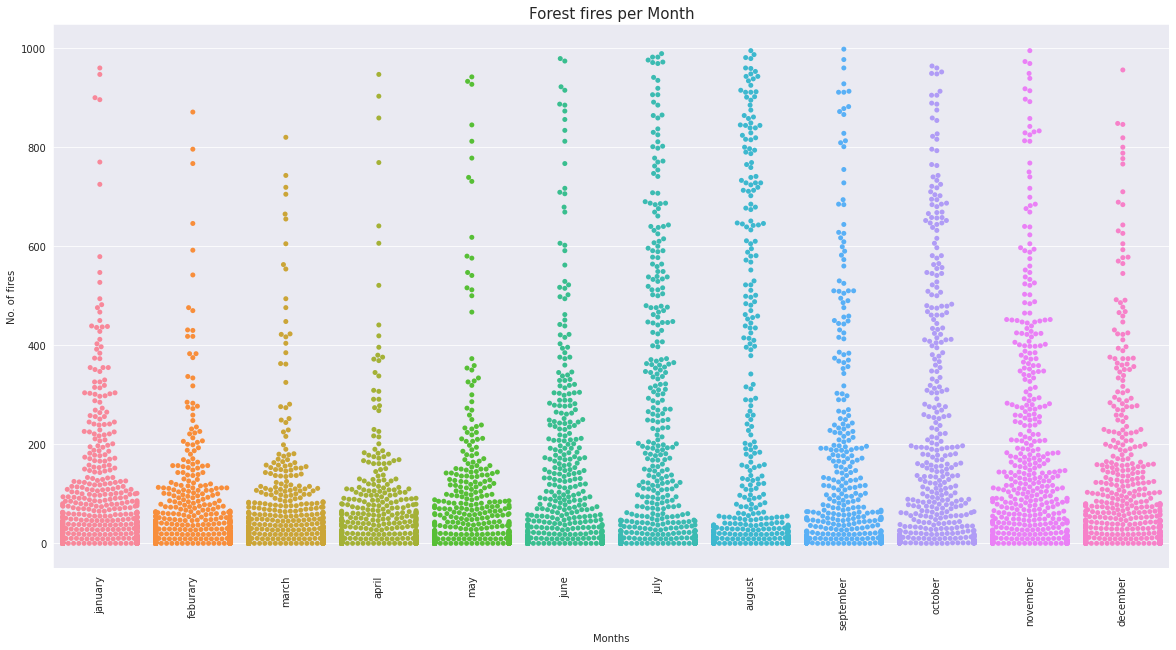

In [14]:
plt.figure(figsize=(20,10))
sns.swarmplot(x = 'month', y = 'number_fires',data = data)
plt.ylabel("No. of fires")
plt.xlabel("Months")
plt.title('Forest fires per Month', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

#### Forest fires per year in Brazil 

In [15]:
time_data = data.groupby('year').sum()

fig = go.Figure(data = go.Scatter(x = time_data.index, y = time_data['number_fires'], line=dict(color="#e30505")))
fig.update_layout(xaxis_title = 'Year',
                  yaxis_title = 'Number of Fires',
                  title = go.layout.Title(text = 'Forest Fires per Year (1998 - 2017)'),
                  plot_bgcolor = 'rgb(250, 242, 242)',
                  yaxis = dict(nticks = 10))
fig.update_xaxes(ticks = 'outside', showline = True, linecolor = 'black', mirror = True)
fig.update_yaxes(ticks = 'outside', showline = True, linecolor = 'black', mirror = True)

fig.show()

#### Forest fires in top-5 states of Brazil

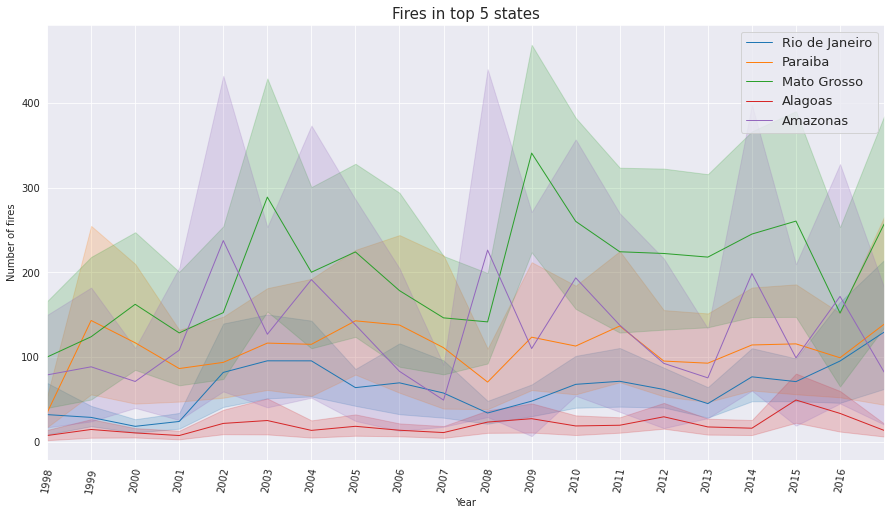

In [16]:
df1 = pd.DataFrame(data=data[data['state'] =='Rio de Janeiro'])
df2 = pd.DataFrame(data=data[data['state'] =='Paraiba'])
df3 = pd.DataFrame(data=data[data['state'] =='Mato Grosso'])
df4 = pd.DataFrame(data=data[data['state'] =='Alagoas'])
df5 = pd.DataFrame(data=data[data['state']=='Amazonas'])
plt.figure(figsize=(15,8))

df_list = [df1, df2, df3, df4,df5]
for x in df_list:
    x.groupby('year')['number_fires'].sum().reset_index()
    sns.lineplot(x='year', y='number_fires', data=x, lw=1, label=x['state'].iloc[0])
    plt.title('Fires in top 5 states', fontsize=15)
    plt.xlabel('Year')
    plt.ylabel('Number of fires')
    plt.xticks(np.arange(1997,2017,1), rotation=80)
    plt.xlim(1998,2017)


plt.legend(fontsize=13)